#1. Import bibliotek

In [2]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [ ]:
print (os.getcwd())

/content


In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/SUML/datasets")

#2. Przygotowanie danych

In [ ]:
base_data = pd.read_csv("DSP_6.csv")

In [ ]:
train = base_data

##2.1 Brakujące dane

In [ ]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

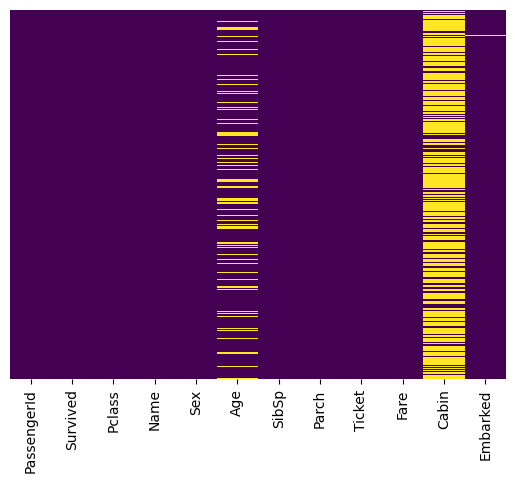

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
train.drop(columns=["Cabin"], inplace=True)

<Axes: >

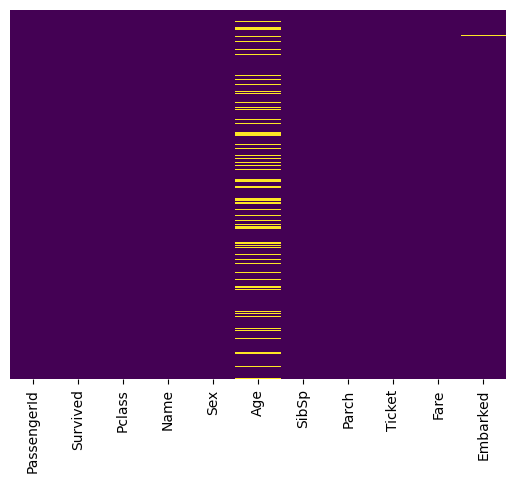

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
train.fillna(train.mean(numeric_only=True), inplace=True)

<Axes: >

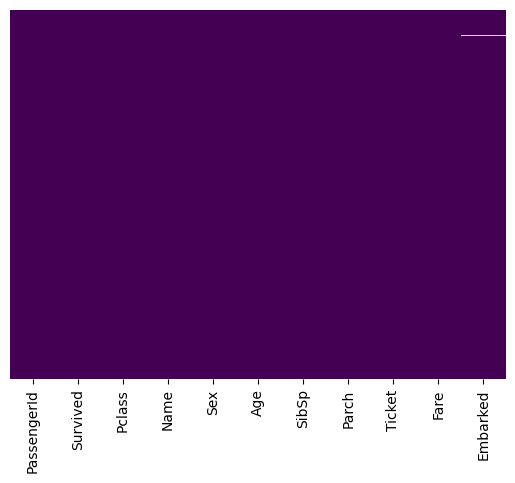

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
train.dropna(inplace=True)

<Axes: >

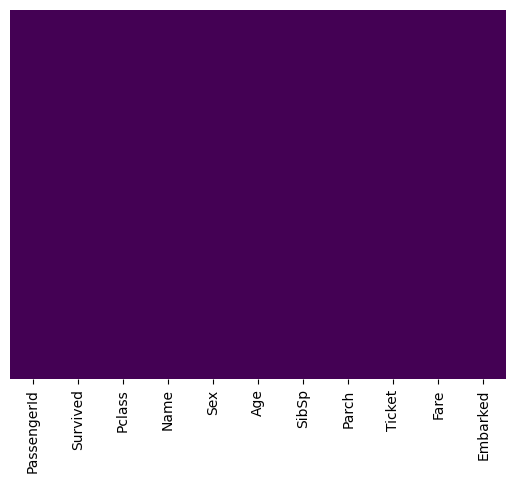

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

##2.2 Eksploracja danych

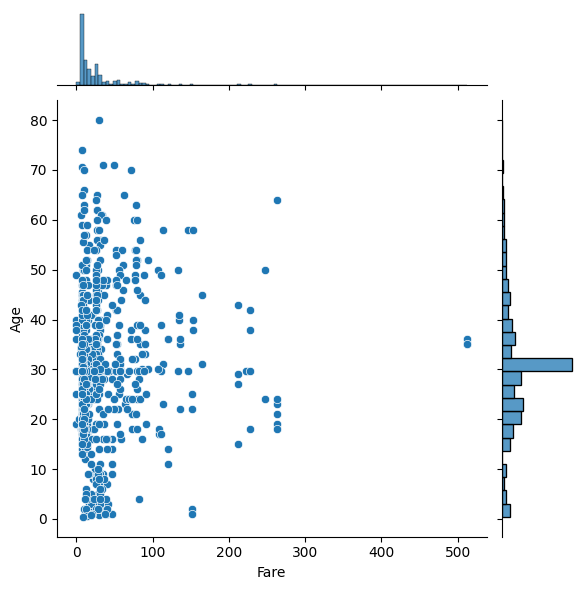

In [ ]:
sns.jointplot(x="Fare", y="Age", data=train)

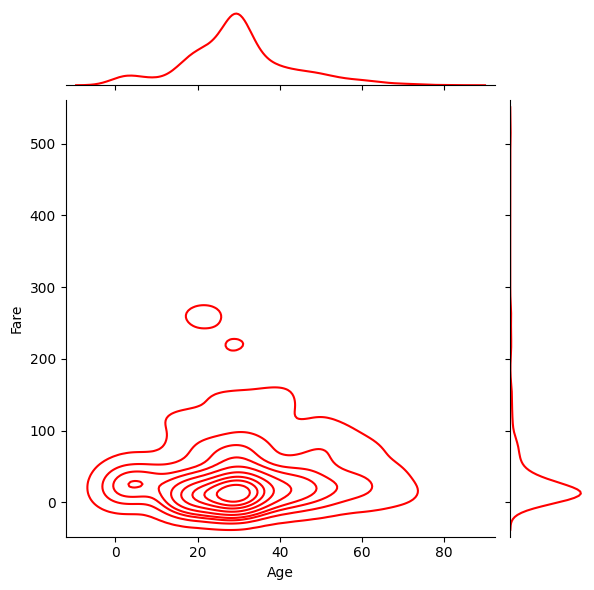

In [ ]:
sns.jointplot(x="Age", y="Fare", color="red", data=train, kind="kde")

<Axes: xlabel='Survived', ylabel='count'>

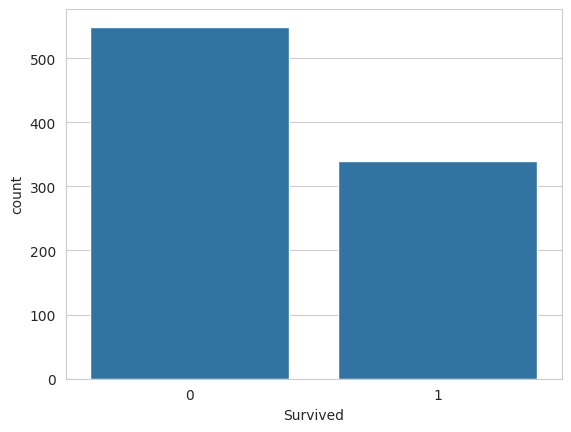

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train)

<Axes: xlabel='Survived', ylabel='count'>

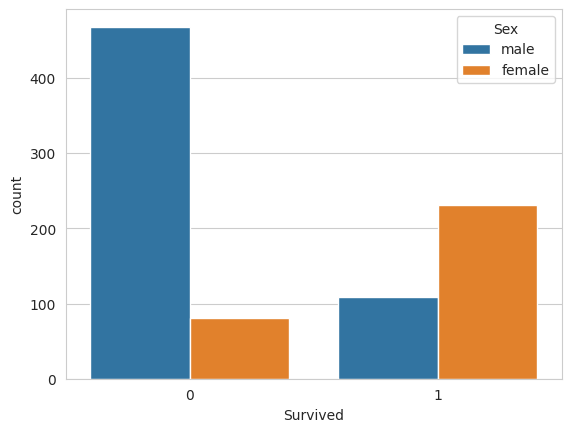

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

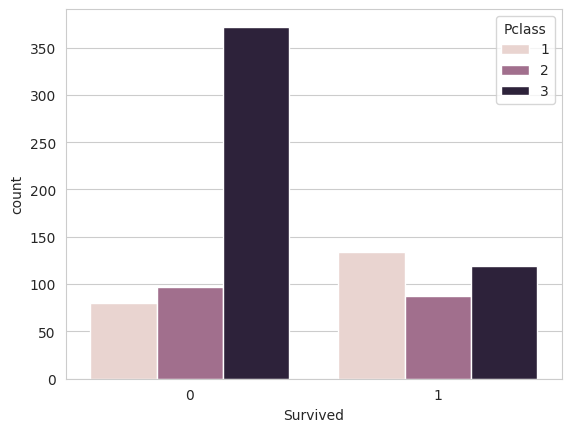

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Pclass")

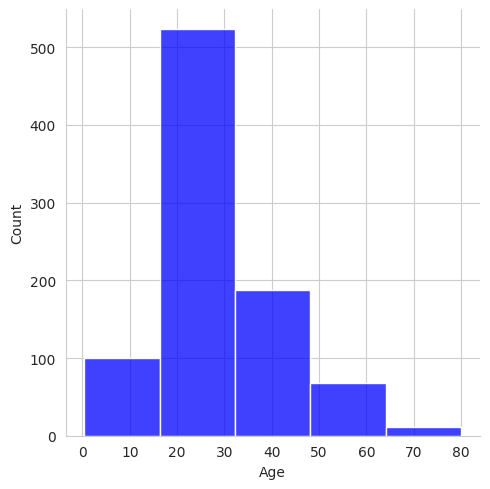

In [ ]:
sns.displot(train["Age"], kde=False, color="blue", bins=5)

<Axes: xlabel='Pclass', ylabel='Age'>

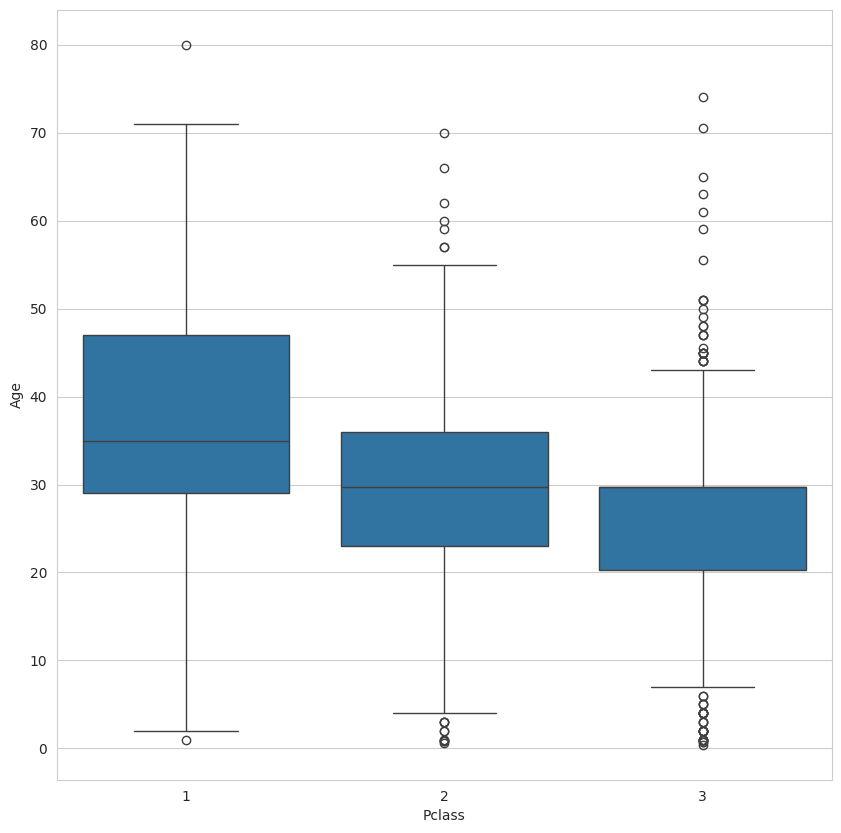

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass", y="Age", data=train)

In [ ]:
cf.go_offline()

In [ ]:
train["Age"].iplot(kind="hist", bins=20, color="green") #nie dzuala w colab. powinien byc interaktywny wykres

##2.3 Konwersja zmiennych do modelu regresji

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(train["Sex"], drop_first=True, dtype="int")
embark = pd.get_dummies(train["Embarked"], drop_first=True, dtype="int")

In [ ]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
train2 = pd.concat([train, sex, embark], axis=1)

In [ ]:
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0


In [ ]:
train2.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [ ]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#3. Regresja logistyczna

In [ ]:
X=train2.drop(["Survived"], axis=1)
y=train2["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [ ]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        57
           1       0.83      0.75      0.79        32

    accuracy                           0.85        89
   macro avg       0.85      0.83      0.84        89
weighted avg       0.85      0.85      0.85        89



In [ ]:
confusion_matrix(y_test, predictions)

array([[52,  5],
       [ 8, 24]])

# Zadanie 1

In [6]:
zad1data = pd.read_csv("DSP_6.csv")

In [9]:
pd.isnull(zad1data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Zadanie 2

In [11]:
zad1data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
zad1data['Family member count'] = zad1data['SibSp'] + zad1data['Parch'] + 1

<Axes: xlabel='Family member count', ylabel='count'>

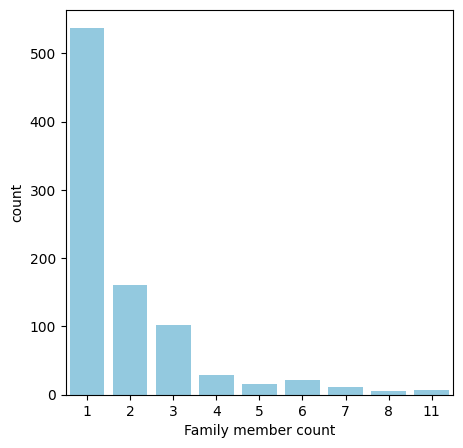

In [19]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Family member count',data=zad1data, color='skyblue')

<Axes: xlabel='Fare', ylabel='Count'>

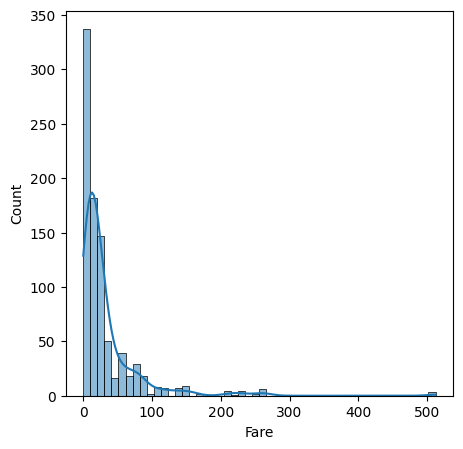

In [18]:
plt.figure(figsize=(5, 5))
sns.histplot(zad1data['Fare'], bins=50, kde=True)

#Zadanie 3

In [20]:
zad3data = pd.read_csv("DSP_6.csv")

In [21]:
zad3data.drop(columns=["Cabin"], inplace=True)

In [22]:
zad3data.fillna(zad3data.mean(numeric_only=True), inplace=True)

In [23]:
zad3data.dropna(inplace=True)

In [25]:
zad3data_zly = zad3data
zad3data_dobry = zad3data

In [27]:
zad3data_zly.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
# rows_class1 = np.where(zad3data_zly['Pclass'] == 1)
# rows_class2 = np.where(zad3data_zly['Pclass'] == 2)
# rows_class3 = np.where(zad3data_zly['Pclass'] == 3)
zad3data_zly_class1 = zad3data_zly.iloc[np.where(zad3data_zly['Pclass'] == 1)].reset_index()
zad3data_zly_class2 = zad3data_zly.iloc[np.where(zad3data_zly['Pclass'] == 2)].reset_index()
zad3data_zly_class3 = zad3data_zly.iloc[np.where(zad3data_zly['Pclass'] == 3)].reset_index()
print(zad3data_zly_class1)
print(zad3data_zly_class2)
print(zad3data_zly_class3)

     index  PassengerId  Survived  Pclass  \
0        1            2         1       1   
1        3            4         1       1   
2        6            7         0       1   
3       11           12         1       1   
4       23           24         1       1   
..     ...          ...       ...     ...   
209    871          872         1       1   
210    872          873         0       1   
211    879          880         1       1   
212    887          888         1       1   
213    889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                              McCarthy, Mr. Timothy J    male  54.0      0   
3                             Bonnell, Miss. Elizabeth  female  58.0      0   
4                         Sloper, Mr. William Thompson    male  

In [63]:

def removeOutliers(dataset, columnName):
  # Calculate the upper and lower limits
  Q1 = dataset[columnName].quantile(0.25)
  Q3 = dataset[columnName].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(dataset[columnName] >= upper)[0]
  lower_array = np.where(dataset[columnName] <= lower)[0]

  # Removing the outliers
  dataset1 = dataset.drop(labels=upper_array, inplace=False)
  dataset2 = dataset1.drop(labels=lower_array, inplace=False)
  return dataset2

zad3data_zly_class1_noOutliers = removeOutliers(zad3data_zly_class1, 'Age')
zad3data_zly_class2_noOutliers = removeOutliers(zad3data_zly_class2, 'Age')
zad3data_zly_class3_noOutliers = removeOutliers(zad3data_zly_class3, 'Age')

zad3data_zly_noOutliers = pd.concat([zad3data_zly_class1_noOutliers, zad3data_zly_class2_noOutliers, zad3data_zly_class3_noOutliers]).reset_index()



<Axes: xlabel='Pclass', ylabel='Age'>

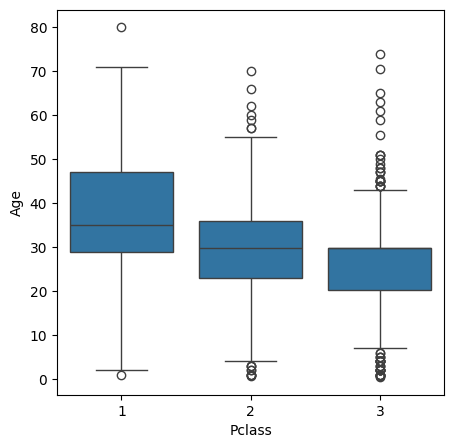

In [67]:
#Przed usunięciem odstających
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass", y="Age", data=zad3data_zly)

<Axes: xlabel='Pclass', ylabel='Age'>

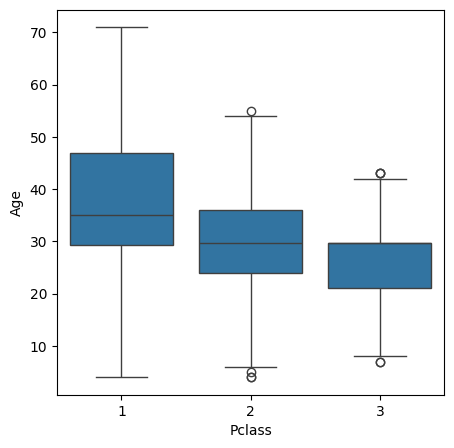

In [66]:
#Po usunięciu odstających
plt.figure(figsize=(5,5))
sns.boxplot(x="Pclass", y="Age", data=zad3data_zly_noOutliers)

In [68]:
# Bez konwersji
X=zad3data_zly_noOutliers.drop(["Survived"], axis=1)
y=zad3data_zly_noOutliers["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

ValueError: could not convert string to float: 'Wick, Mrs. George Dennick (Mary Hitchcock)'

Widzimy błąd związany z obecnością danych tekstowych, niezrozumiałych dla algorytmu

In [76]:
sex = pd.get_dummies(zad3data_zly_noOutliers["Sex"], drop_first=True, dtype="int")
embark = pd.get_dummies(zad3data_zly_noOutliers["Embarked"], drop_first=True, dtype="int")
zad3data_zly_noOutliers_converted = pd.concat([zad3data_zly_noOutliers, sex, embark], axis=1)
zad3data_zly_noOutliers_converted.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)
# Po konwersji
X=zad3data_zly_noOutliers_converted.drop(["Survived"], axis=1)
y=zad3data_zly_noOutliers_converted["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        47
           1       0.84      0.74      0.79        35

    accuracy                           0.83        82
   macro avg       0.83      0.82      0.82        82
weighted avg       0.83      0.83      0.83        82



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([[42,  5],
       [ 9, 26]])

In [77]:

# Po konwersji (więcej iteracji)
X=zad3data_zly_noOutliers_converted.drop(["Survived"], axis=1)
y=zad3data_zly_noOutliers_converted["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        47
           1       0.84      0.74      0.79        35

    accuracy                           0.83        82
   macro avg       0.83      0.82      0.82        82
weighted avg       0.83      0.83      0.83        82



array([[42,  5],
       [ 9, 26]])

In [80]:

# Po konwersji (więcej iteracji)
X=zad3data_zly_noOutliers_converted.drop(["Survived"], axis=1)
y=zad3data_zly_noOutliers_converted["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=420)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.81      0.83      0.82        35

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



array([[40,  7],
       [ 6, 29]])

In [ ]:
#Po zmianie random_state zmieniło się F1 score dla wartości "1". Widzimy też delikatne różnie w confusion matrix

#Zadanie 4

In [81]:
zad4data = pd.read_csv("DSP_2.csv")

In [82]:
pd.isnull(zad4data).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Brak brakujących danych. Nieźle

In [93]:
zad4data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Eksploracja danych

<Axes: xlabel='HeartDisease', ylabel='count'>

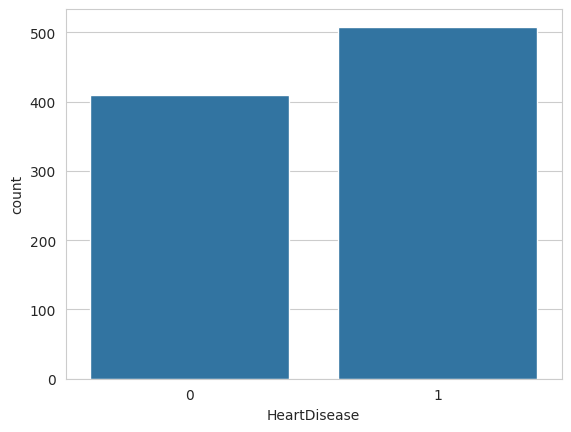

In [85]:
sns.set_style("whitegrid")
sns.countplot(x="HeartDisease", data=zad4data)

W miarę zbalansowany zbiór. Ok

<Axes: xlabel='Sex', ylabel='count'>

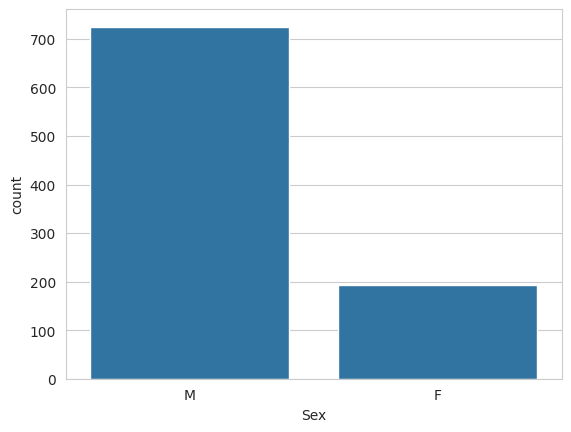

In [88]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", data=zad4data)

Znacznie mniej danych od kobiet więc może być mniej precyzyjny niż dla mężczyzn

<Axes: xlabel='HeartDisease', ylabel='count'>

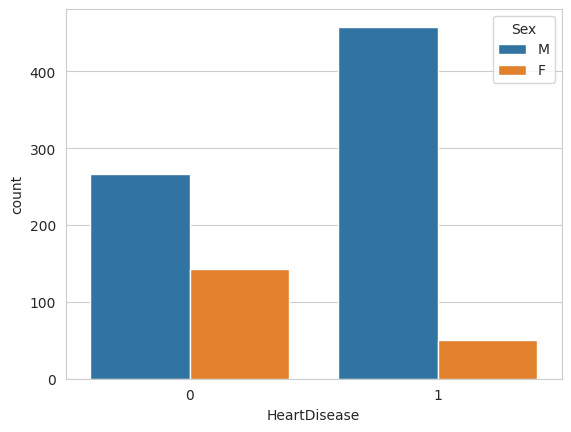

In [87]:
sns.set_style("whitegrid")
sns.countplot(x="HeartDisease", data=zad4data, hue="Sex")

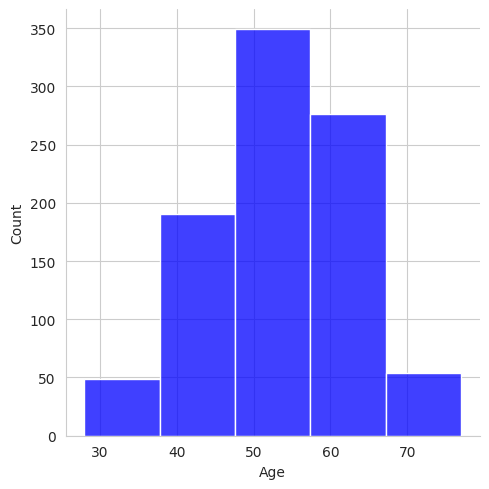

In [89]:
sns.displot(zad4data["Age"], kde=False, color="blue", bins=5)

Zdecydowana większość danych pochodzi od osób w wieku około 50 lat. Do przewidzenia ale to znaczy że precyzja dla ludzi młodych i bardzo starych będzie niższa

In [90]:
sex = pd.get_dummies(zad4data["Sex"], drop_first=True, dtype="int")
chestpaintype = pd.get_dummies(zad4data["ChestPainType"], drop_first=True, dtype="int")
restingecg = pd.get_dummies(zad4data["RestingECG"], drop_first=True, dtype="int")
exerciseangina = pd.get_dummies(zad4data["ExerciseAngina"], drop_first=True, dtype="int")
stslope = pd.get_dummies(zad4data["ST_Slope"], drop_first=True, dtype="int")

zad4data_converted = pd.concat([zad4data, sex, chestpaintype, restingecg, exerciseangina, stslope], axis=1)
zad4data_converted.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], axis=1, inplace=True)

In [91]:
# Uczenie
X=zad4data_converted.drop(["HeartDisease"], axis=1)
y=zad4data_converted["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=420)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.86      0.94      0.90        54

    accuracy                           0.88        92
   macro avg       0.89      0.87      0.87        92
weighted avg       0.88      0.88      0.88        92



array([[30,  8],
       [ 3, 51]])

Model cechuje się dobrymi parametrami (wysokie F1 score dla obydwu klas) ale moim zdaniem nie mógłby zostać wykorzystany w praktyce dla osób w wieku nie zbliżonym do 50 lat